In [390]:
import warnings
warnings.filterwarnings("ignore")

In [412]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.ensemble import RandomForestClassifier

#  Data Preparation

In [434]:
file = open("1.txt","r",encoding="utf8")
label=[]
text=[]
for line in file:
    text_split=line.split("\t")
    text.append(text_split[0])
    label.append(text_split[1])
        

In [435]:
file = open("2.txt","r",encoding="utf8")
for line in file:
    text_split=line.split("\t")
    text.append(text_split[1])
    label.append(text_split[0])

In [436]:
file = open("3.txt","r",encoding="utf8")
test_index1=[]
test_index2=[]
test_text=[]
for line in file:
    text_split=line.split(",")
    test_index1.append(text_split[0])
    test_index2.append(text_split[1])
    test_text.append(text_split[2])
test_text=test_text[1:]
test_index2=test_index2[1:]

In [437]:
label1=[]
for i in label:
    label_split=i.split()
    label1.append(int(label_split[0]))   

# <h2> Data Analysis: Checking Whether Sentences contains HTML Tags <\h2>

In [ ]:
# find sentences containing HTML tags
import re
i=0;
for sent in text:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;    

# Text Pre-Processing User Defined Functions:
  1. Cleaning HTML Tags
  2. Cleaning Punctuations from Sentences like[.|,|"|!,#] or any Special words.
  3. Removing Stopwords, then Lemmitization of words are done in Pre-Processing

In [438]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#stop = set(stopwords.words('english')) #set of stopwords


def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|-|--]',r' ',cleaned)
    cleaned= re.sub(r'[^\x00-\x7f]',r'', cleaned) 
    return  cleaned
def pre_processed(text):
    nltk.download('wordnet')
    sno = WordNetLemmatizer() 
    stop={'by',"id",'down', 'having', 'can', "shes", 'yourself','to', 'theirs',"youve", 'both', 't', 'she', 'a', 'your', 'yours', 'themselves', 'him', 'then', 'be', 'the','very' 'his', 'are', 'you',"youd", 'ours', 'which', 'into', 'when', "its", 'so', 'who', 'herself', 'other', 'on', 'over','their', 'about', 'y', 'any', 'was', 'before','do', 'an','had', 'as', 'my','have', 'further', 'or', 'own', 'at','where', 'with', 'has', 'its', 'should', 'them', "you'll", 'out', 'were', 'such', 'our', 'am', 'those', 'what', 'this', 'in','more', 're', 'that', 'each', 'while', 'same','under', 'o', 'above', 'but', 'whom', 'again', 'of', 'yourselves', 'up', 'being', 'ourselves', 'myself', 'i', 'only', 'now',  'ma', 've', 'me','her', 'he', 'if', 'during', 'd','will', 's', 'once', 'hers', 'm', 'does', 'because', 'why', 'from', 'doing', 'than', 'been','did','is', 'they', 'these', 'all', 'we', 'for',"you're", 'll', 'too', 'itself', 'until', 'himself', 'it', 'there', 'and', 'through', 'some', 'here', "that'll"}
    i=0
    str1=' '
    final_string=[]
    s=''
    for sent in text:
        filtered_sentence=[]
        sent=cleanhtml(sent) # remove HTMl tags
        for w in sent.split():
            for cleaned_words in cleanpunc(w).split():
                if((cleaned_words.isalpha()) & (len(cleaned_words)>=2)):    
                    if(cleaned_words.lower() not in stop):
                        s=(sno.lemmatize(cleaned_words.lower())).encode('utf8')
                        filtered_sentence.append(s)
                    else:
                        continue
                   
                else:
                    continue 
        str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
        final_string.append(str1)
        i+=1
    return final_string

# <h1> Function for plotting confusion matrix </h1>

In [418]:
def conf_matrix(model,X_test_1,X_train_1,y_test,y_train):
    labels=[1,0]
    y_pred=model.predict(X_test_1)
    y_train_pred=model.predict(X_train_1)
    cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                     index = ['1','0'], 
                     columns = ['1','0'])

    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
    plt.title(' \nTest Accuracy:{0:.3f} and Train Accuracy {1:.3f}'.format(accuracy_score(y_test, y_pred)*100,accuracy_score(y_train, y_train_pred)*100))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Reviews After Preprocessing

In [441]:
final_string= pre_processed(text)
for i in final_string[120:125]:
    print(i)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


b'great film great director'
b'movie edge seat made somewhat afraid go car end night'
b'music film really nice'
b'advise anyone go see'
b'brilliant'


# Reviews Before Preprocessing

In [442]:
for i in text[120:125]:
    print(i)

A great film by a great director.  
The movie had you on the edge of your seat and made you somewhat afraid to go to your car at the end of the night.  
The music in the film is really nice too.  
I'd advise anyone to go and see it.  
Brilliant!  


In [443]:
label1[120:125]

array([1, 1, 1, 1, 1])

In [444]:
final=np.asarray(final_string)
label1=np.asarray(label1)

In [445]:
print("The Total No of Reviews for Training:- {}".format(final.shape[0]))

The Total No of Reviews for Training:- 8038


In [446]:
unique_elements, counts_elements = np.unique(label1, return_counts=True)
print('The Positive Sentiments in the dataset:-{}'.format(counts_elements[1]))
print('The Negative Sentiments in the dataset:-{}'.format(counts_elements[0]))

The Positive Sentiments in the dataset:-4479
The Negative Sentiments in the dataset:-3559


# Splitting of Dataset
   1. Data from 1.txt and 2.txt are combine and pre-processed
   2. The data is splitted between train and test set with 85% for training and 15% Test

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final,label1, test_size=0.15, random_state=42)

# BAG OF WORD FOR TEXT TO VECTOR CONVERSION

In [448]:
count_vect = CountVectorizer() #in scikit-learn
X_train_1 = count_vect.fit_transform(X_train)
X_train_1.shape

(6832, 3387)

In [449]:
Standard=StandardScaler(with_mean=False).fit(X_train_1)
Standard_data=Standard.transform(X_train_1)
X_train_1=Standard_data

# Model on BOW
  1. Logistic Regression Model with Grid Cross Validation is used
  2. For Cross validation 5 fold Cross validation is used
  3. L2 Regulariser with Regularisation Parameter Lambda is tuned Here. (In sklearn lambda=1/C)
  4. Regulariser avoids Overfitting of data.
  5. The Model train on 85% of actual data and 15% data used for testing. to check whether model is overfitting or not.

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1, 10**0, 10**2]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train_1,y_train)
print(model.best_estimator_)
model=model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# Results for test data(15% of Actual)

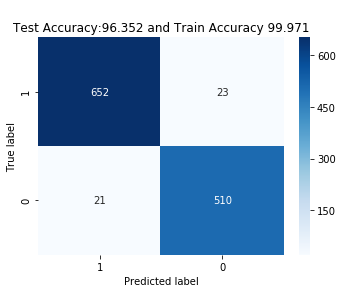

In [451]:
X_test_1= count_vect.transform(X_test)
X_test_1=Standard.transform(X_test_1)
conf_matrix(model,X_test_1,X_train_1,y_test,y_train)

# <h4> Result For Data obtained from 3.txt file </h4>

In [452]:
final_string_test=pre_processed(test_text)
X_test_2=np.asarray(final_string_test)
X_test_2= count_vect.transform(X_test_2)
X_test_2=Standard.transform(X_test_2)
prediction=model.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('BOW_LR.csv')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TF-IDF FOR TEXT TO VECTOR CONVERSION

In [453]:
tf_idf_vect = TfidfVectorizer()
X_train_1= tf_idf_vect.fit_transform(X_train)

In [454]:
Standard=StandardScaler(with_mean=False).fit(X_train_1)
Standard_data=Standard.transform(X_train_1)
X_train_1=Standard_data

# TF-IDF-Logistic Regression

In [455]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**x for x in range(-8,3)]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train_1,y_train)
print(model.best_estimator_)
model=model.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


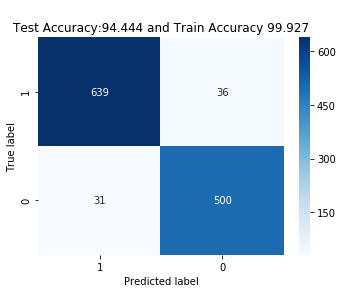

In [456]:
X_test_1= tf_idf_vect.transform(X_test)
X_test_1=Standard.transform(X_test_1)
conf_matrix(model,X_test_1,X_train_1,y_test,y_train)

<h4> Result For Data obtained from 3.txt file </h4>

In [457]:
final_string_test=pre_processed(test_text)
X_test_2=np.asarray(final_string_test)
X_test_2= tf_idf_vect.transform(X_test_2)
X_test_2=Standard.transform(X_test_2)
prediction=model.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('TFIDF_LR.csv')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TFIDF-Random Forest

In [458]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [400,500,700],
    'max_depth' : [5,10,15],
}
model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model.fit(X_train_1, y_train)
print(model.best_estimator_)
model=model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


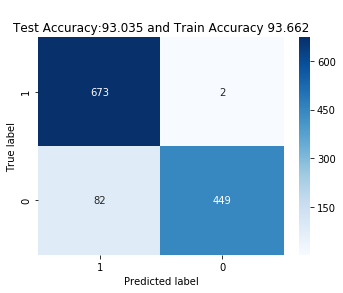

In [459]:
X_test_1= tf_idf_vect.transform(X_test)
X_test_1=Standard.transform(X_test_1)
conf_matrix(model,X_test_1,X_train_1,y_test,y_train)

In [460]:
final_string_test=pre_processed(test_text)
X_test_2=np.asarray(final_string_test)
X_test_2= tf_idf_vect.transform(X_test_2)
X_test_2=Standard.transform(X_test_2)
prediction=model.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('TFIDF_RF.csv')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Word to Vector Method

In [329]:
def pre_processed_w2v(text):
    list_of_sent=[]
    sno = WordNetLemmatizer() 
    for sent in text:
        filtered_sentence=[]
        sent=cleanhtml(sent)
        for w in sent.split():
            for cleaned_words in cleanpunc(w).split():
                if(cleaned_words.isalpha()):    
                    filtered_sentence.append(sno.lemmatize(cleaned_words.lower()))
                else:
                    continue 
        list_of_sent.append(filtered_sentence)
    return list_of_sent

In [330]:
def vec_sent(X): 
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in X: # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors 

In [348]:
list_of_sent=pre_processed_w2v(text)
X_train, X_test, y_train, y_test = train_test_split(list_of_sent,label1, test_size=0.15, random_state=42)
w2v_model=gensim.models.Word2Vec(X_train,min_count=2,size=300, workers=4) 
X_train_1=vec_sent(X_train)

In [351]:
np.argwhere(np.isnan(np.asarray(X_train_1)))

array([[5672,    0],
       [5672,    1],
       [5672,    2],
       ...,
       [6246,  297],
       [6246,  298],
       [6246,  299]], dtype=int64)

In [352]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(X_train_1)
X_train_1=impute.transform(X_train_1)

In [353]:
Scaler=StandardScaler()
Scaler.fit(X_train_1)
X_train_1=Scaler.transform(X_train_1)

In [354]:
tuned_parameters = [{'C': [10**-3,10**-2,10**-1,1,10,100,1000]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train_1, y_train)
print(model.best_estimator_)
model=model.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


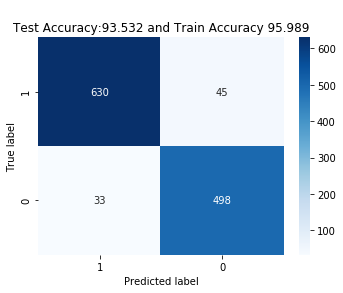

In [355]:
X_test_1=vec_sent(X_test)
X_test_1=impute.transform(X_test_1)
X_test_1=Scaler.transform(X_test_1)
conf_matrix(model,X_test_1,X_train_1,y_test,y_train)

<h4> Result For Data obtained from 3.txt file </h4>

In [360]:
final_string_test=pre_processed_w2v(test_text)
X_test_2= vec_sent(np.asarray(final_string_test))
X_test_2=impute.transform(X_test_2)
X_test_2=Scaler.transform(X_test_2)
prediction=model.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('W2V_LR.csv')

# Random Forest Model On W2V 

In [362]:
list_of_sent=pre_processed_w2v(text)
X_train, X_test, y_train, y_test = train_test_split(list_of_sent,label1, test_size=0.15, random_state=42)
w2v_model=gensim.models.Word2Vec(X_train,min_count=2,size=300, workers=4) 
X_train_1=vec_sent(X_train)
# Imputer
impute=Imputer(strategy='mean')
impute.fit(X_train_1)
X_train_1=impute.transform(X_train_1)
# Standardization
Scaler=StandardScaler()
Scaler.fit(X_train_1)
X_train_1=Scaler.transform(X_train_1)

In [363]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [20,30,50,100,200,400,500],
    'max_depth' : [7,8,9,10],
}
model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model.fit(X_train_1, y_train)
print(model.best_estimator_)
model=model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


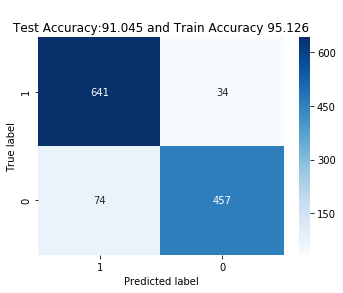

In [364]:
X_test_1=vec_sent(X_test)
X_test_1=impute.transform(X_test_1)
X_test_1=Scaler.transform(X_test_1)
conf_matrix(model,X_test_1,X_train_1,y_test,y_train)

In [365]:
final_string_test=pre_processed_w2v(test_text)
X_test_2= vec_sent(np.asarray(final_string_test))
X_test_2=impute.transform(X_test_2)
X_test_2=Scaler.transform(X_test_2)
prediction=model.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('W2V_RF.csv')

# SVM on W2V

In [379]:
list_of_sent=pre_processed_w2v(text)
X_train, X_test, y_train, y_test = train_test_split(list_of_sent,label1, test_size=0.15, random_state=42)
X_train, X_CV, y_train, y_CV = train_test_split(X_train,y_train, test_size=0.15, random_state=42)
w2v_model=gensim.models.Word2Vec(X_train,min_count=2,size=300, workers=4) 
X_train_1=vec_sent(X_train)
X_cv_1=vec_sent(X_CV)
# Imputer
impute=Imputer(strategy='mean')
impute.fit(X_train_1)
X_train_1=impute.transform(X_train_1)
X_cv_1=impute.transform(X_cv_1)
# Standardization
Scaler=StandardScaler()
Scaler.fit(X_train_1)
X_train_1=Scaler.transform(X_train_1)
X_cv_1=Scaler.transform(X_cv_1)

In [380]:
X_test_1=vec_sent(X_test)
X_test_1=impute.transform(X_test_1)
X_test_1=Scaler.transform(X_test_1)

for C = 1e-07
Log Loss : 0.33954987302545386
for C = 1e-06
Log Loss : 0.297525016476218
for C = 1e-05
Log Loss : 0.2978415542296643
for C = 0.0001
Log Loss : 0.33216979354797277
for C = 0.001
Log Loss : 0.29764506397535284
for C = 0.01
Log Loss : 0.33496782246190365
for C = 0.1
Log Loss : 0.39225451974276715
for C = 1
Log Loss : 0.46245165062175614
for C = 10
Log Loss : 0.5633254899427166
for C = 100
Log Loss : 0.6427356974165799


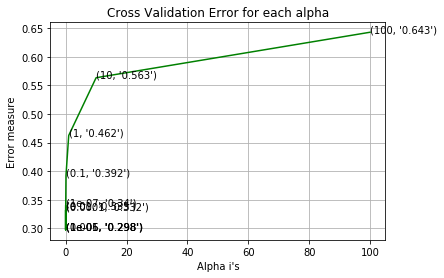

For values of best alpha =  1e-06 The train log loss is: 0.27841051117639576
For values of best alpha =  1e-06 The cross validation log loss is: 0.297525016476218
For values of best alpha =  1e-06 The test log loss is: 0.2853680300483015


In [381]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-7, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train_1,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_1,y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv_1)
    cv_log_error_array.append(log_loss(y_CV, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_CV, sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train_1,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_1,y_train)

predict_y = sig_clf.predict_proba(X_train_1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_CV, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4> Result For Data obtained from 3.txt file </h4>

In [383]:
final_string_test=pre_processed_w2v(test_text)
X_test_2= vec_sent(np.asarray(final_string_test))
X_test_2=impute.transform(X_test_2)
X_test_2=Scaler.transform(X_test_2)
prediction=sig_clf.predict(X_test_2)
df=pd.DataFrame()
df["index of text"]=test_index2
df["prediction"]=prediction
df['Review']=test_text
df.to_csv('W2V_SVM.csv')